In [3]:
import seaborn as sns



In [5]:
import pandas as pd
data=pd.read_csv('final_balanced_dataset.csv')
data.head()

,tweets,label
0,कल के आये कुछ आईटी सेल के लोग योगी जी के विरोध...,defamation
1,भारत मे चोर बाजार के धंधे भी शांतिदूत ही करते ...,defamation
2,@narendramodi वह गब्बू फेकू अंबानी अडानी के रि...,offensive
3,कुछ दिनो के बाद #मोदीजी गायब\n#विकास_गायब_है,defamation
4,मतलब युवा दलाली करते है लेकिन किसकी? वो तो खुद...,defamation


<Axes: xlabel='label', ylabel='count'>

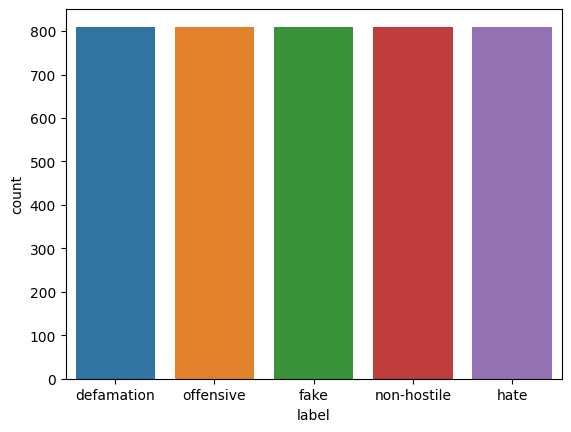

In [6]:
sns.countplot(data=data,x='label')

In [7]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.6 MB/s eta 0:00:00


In [8]:
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')


# Function to get BERT embeddings for a text
def get_bert_embeddings(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=128, pad_to_max_length=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs['last_hidden_state']

# Iterate through the tweets and get BERT embeddings
embeddings = []
for tweet in tqdm(data['tweets']):
    tweet_embeddings = get_bert_embeddings(tweet)
    mean_embedding = torch.mean(tweet_embeddings, dim=1).squeeze().numpy()
    embeddings.append(mean_embedding)

# Create a new DataFrame with embeddings and labels
embedding_df = pd.DataFrame(embeddings)
embedding_df['labels'] = data['label']

# Save the embeddings along with labels to a new CSV file
embedding_df.to_csv('bert_embeddings.csv', index=False)


  0%|          | 0/4050 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
  0%|          | 1/4050 [00:02<2:51:41,  2.54s/it]/usr/loca